# ------------------------------------------------------------
# Step 2.1: Basic Insights of Startup Funding Dataset
# ------------------------------------------------------------

In [1]:
import pandas as pd

In [3]:
# Load the cleaned Dataset

df = pd.read_csv("C:\\Data_Analytics_Projects\\Indian_Startup_Funding_Analysis\\Data\\cleaned_startup_funding_2015_2024_raw.csv")

In [4]:
# Display first few Records

df.head()

,Sr_No,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,InvestmentnType,Amount_in_USD,Remarks,Year,Month
0,1,09-01-2020,Byjus,E-tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000,Unknown,2020,JANUARY
1,2,13-01-2020,Shuttl,Logistics,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394,Unknown,2020,JANUARY
2,3,09-01-2020,Mamaearth,E-Commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860,Unknown,2020,JANUARY
3,4,02-01-2020,Https://www.wealthbucket.in/,FinTech,Online Investment,Delhi,Vinod Khatumal,Pre-series A,3000000,Unknown,2020,JANUARY
4,5,02-01-2020,Fashor,Fashion & lifestyle,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000,Unknown,2020,JANUARY


In [5]:
# Basic Info

print("Shape of the dataset:", df.shape)
print("\nColumns in dataset:\n", df.columns.tolist())
print("\nDataset Information:\n")
print(df.info())

Shape of the dataset: (3043, 12)

Columns in dataset:
 ['Sr_No', 'Date', 'Startup_Name', 'Industry_Vertical', 'SubVertical', 'City_Location', 'Investors_Name', 'InvestmentnType', 'Amount_in_USD', 'Remarks', 'Year', 'Month']

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr_No              3043 non-null   int64 
 1   Date               3043 non-null   object
 2   Startup_Name       3043 non-null   object
 3   Industry_Vertical  3043 non-null   object
 4   SubVertical        3043 non-null   object
 5   City_Location      3043 non-null   object
 6   Investors_Name     3043 non-null   object
 7   InvestmentnType    3039 non-null   object
 8   Amount_in_USD      3043 non-null   int64 
 9   Remarks            3043 non-null   object
 10  Year               3043 non-null   int64 
 11  Month              3043 non-nu

In [5]:
# Summary statistics for numerical columns

print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

             Sr_No  Amount_in_USD         Year  No_of_Investors
count  3046.000000   3.046000e+03  3046.000000      3046.000000
mean   1525.011819   1.604941e+07  2016.266251         2.035456
std     880.431460   1.239102e+08     1.188488         1.499444
min       1.000000   2.000000e+01  2015.000000         0.000000
25%     763.250000   6.000000e+05  2015.000000         1.000000
50%    1524.500000   1.500000e+06  2016.000000         1.000000
75%    2285.750000   5.000000e+06  2017.000000         3.000000
max    3054.000000   3.900000e+09  2024.000000        10.000000


In [6]:
# Check for any remaining null values

print("\nMissing Values per Column:\n")
print(df.isnull().sum())


Missing Values per Column:

Sr_No                0
Date                 0
Startup_Name         0
Industry_Vertical    0
SubVertical          0
City_Location        0
Investors_Name       0
InvestmentnType      4
Amount_in_USD        0
Remarks              0
Year                 0
Month                0
dtype: int64


In [6]:
# Unique counts for key columns

print("\nUnique Startups:", df['Startup_Name'].nunique())
print("Unique Cities:", df['City_Location'].nunique())
print("Unique Investors:", df['Investors_Name'].nunique())
print("Unique Industries:", df['Industry_Vertical'].nunique())


Unique Startups: 2463
Unique Cities: 111
Unique Investors: 2416
Unique Industries: 821


In [12]:
# Find earliest and latest funding years

df['Year'] = pd.to_datetime(df['Date']).dt.year
print("\nDataset covers funding data from", df['Year'].min(), "to", df['Year'].max())


Dataset covers funding data from 2015 to 2024


# ------------------------------------------------------------
# Step 2.2: Funding Trends Over Time (2015–2024)
# ------------------------------------------------------------

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Group data by year for total funding and count of rounds

yearly_trends = df.groupby('Year').agg({
                                   'Amount_in_USD': 'sum',
                                   'Startup_Name': 'count'
                }).reset_index().rename(columns={'Startup_Name': 'Funding_Rounds'})

In [20]:
# Display table

print("Yearly Funding Summary:")
display(yearly_trends)

Yearly Funding Summary:


,Year,Amount_in_USD,Funding_Rounds
0,2015,1.763114e+10,929
1,2016,4.235123e+09,993
2,2017,1.093750e+10,687
3,2018,5.373556e+09,309
4,2019,9.795464e+09,111
5,2020,3.902073e+08,7
6,2022,2.780000e+08,2
7,2023,3.800000e+07,2
8,2024,2.075000e+08,6


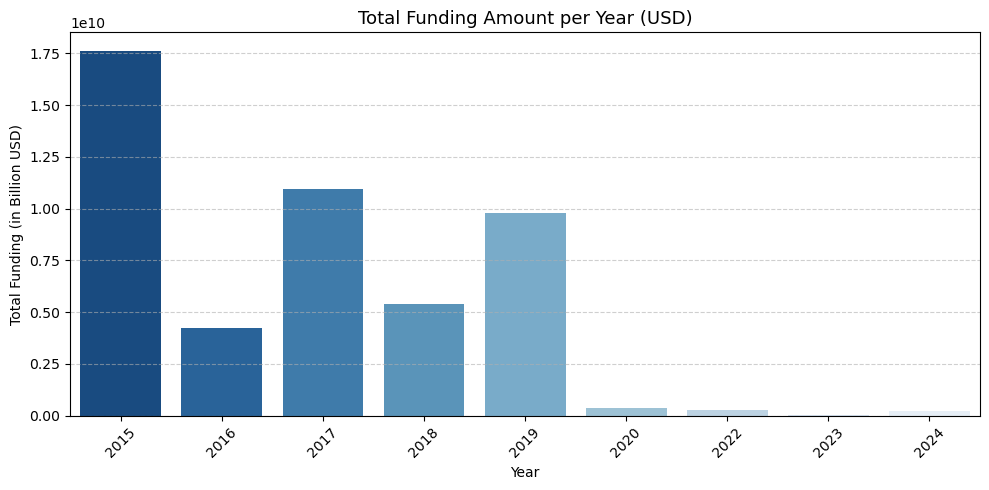

In [52]:
# --- Plot 1: Total Funding Amount per Year ---

plt.figure(figsize=(10,5))
sns.barplot(data=yearly_trends, x='Year', y='Amount_in_USD', palette='Blues_r')
plt.title("Total Funding Amount per Year (USD)", fontsize=13)
plt.ylabel("Total Funding (in Billion USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("01_top_funding_amount.jpg", bbox_inches='tight')
plt.show()

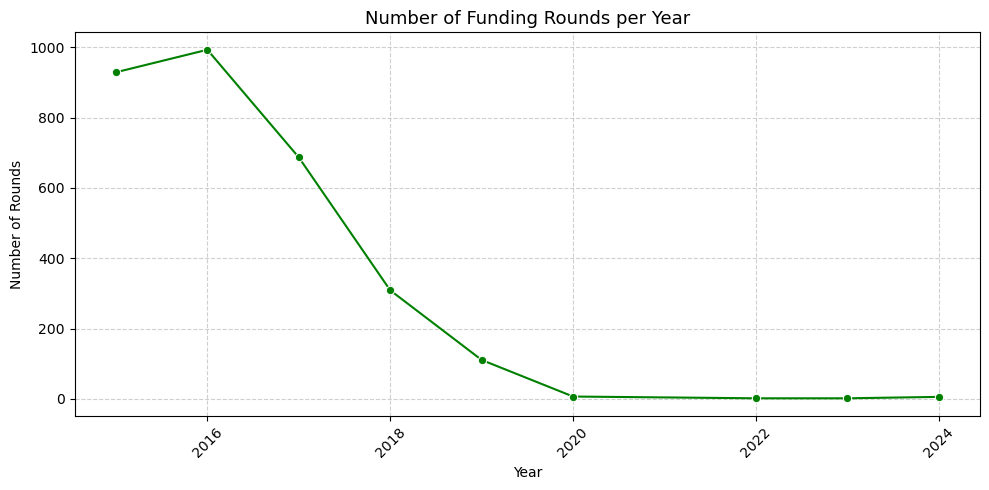

In [54]:
# --- Plot 2: Number of Funding Rounds per Year ---

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_trends, x='Year', y='Funding_Rounds', marker='o', color='green')
plt.title("Number of Funding Rounds per Year", fontsize=13)
plt.ylabel("Number of Rounds")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("02_no_of_fundings_per_year.jpg", bbox_inches='tight')
plt.show()

In [25]:
# --- Top 3 years by total funding ---

top_years = yearly_trends.sort_values(by='Amount_in_USD', ascending=False).head(3)
print("\nTop 3 Years by Total Funding:")
display(top_years)


Top 3 Years by Total Funding:


,Year,Amount_in_USD,Funding_Rounds
0,2015,1.763114e+10,929
2,2017,1.093750e+10,687
4,2019,9.795464e+09,111


# ------------------------------------------------------------
# Step 2.3 – City-wise Funding Analysis
# ------------------------------------------------------------

In [8]:
# Clean city names (remove extra spaces, fix capitalization)

df['City_Location'] = df['City_Location'].str.strip().str.title()

In [9]:
# Group by city: total funding amount & number of startups

city_funding = df.groupby('City_Location').agg({
    'Amount_in_USD': 'sum',
    'Startup_Name': 'count'
}).reset_index().rename(columns={'Startup_Name': 'Funding_Rounds'})

In [10]:
# Sort to find top 10 cities

top_cities_funding = city_funding.sort_values(by='Amount_in_USD', ascending=False).head(10)
top_cities_rounds = city_funding.sort_values(by='Funding_Rounds', ascending=False).head(10)

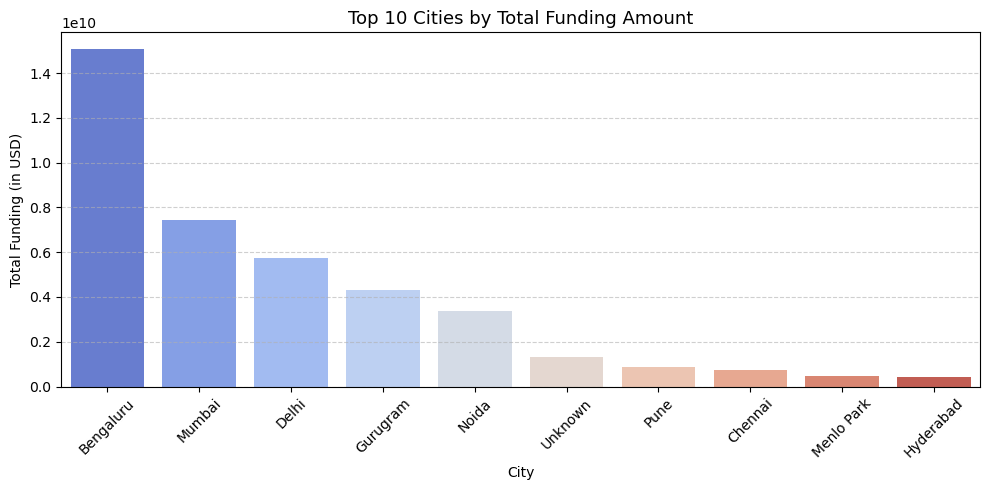

In [11]:
# --- Plot 1: Top 10 Cities by Total Funding Amount ---

plt.figure(figsize=(10,5))
sns.barplot(data=top_cities_funding, x='City_Location', y='Amount_in_USD', palette='coolwarm')
plt.title("Top 10 Cities by Total Funding Amount", fontsize=13)
plt.ylabel("Total Funding (in USD)")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("03_top_10_Cities_by_total_funding.jpg", bbox_inches='tight')
plt.show()

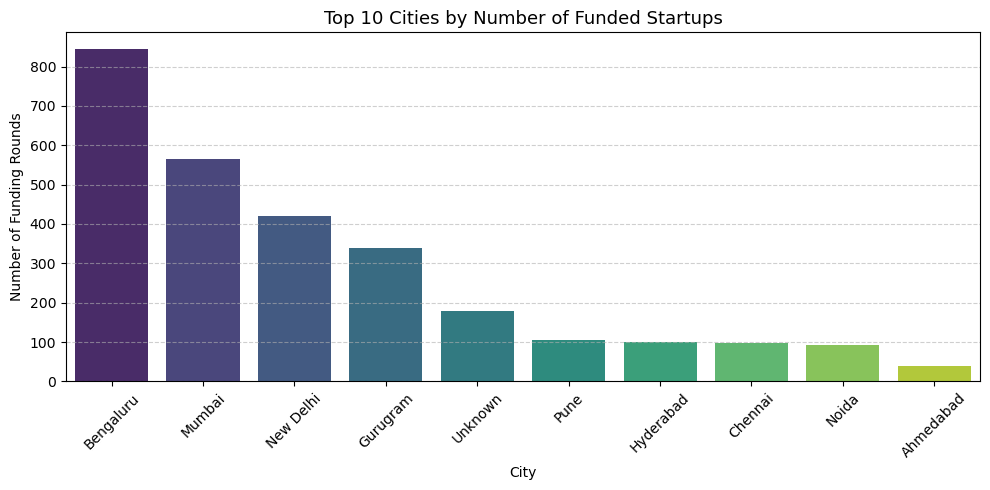

In [56]:
# --- Plot 2: Top 10 Cities by Number of Funded Startups ---

plt.figure(figsize=(10,5))
sns.barplot(data=top_cities_rounds, x='City_Location', y='Funding_Rounds', palette='viridis')
plt.title("Top 10 Cities by Number of Funded Startups", fontsize=13)
plt.ylabel("Number of Funding Rounds")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("04_top_10_cities_by_number_of_funded_startups.jpg", bbox_inches='tight')
plt.show()

In [32]:
# --- Display both tables for reference ---

print("\nTop 10 Cities by Total Funding:")
display(top_cities_funding)

print("\nTop 10 Cities by Number of Funded Startups:")
display(top_cities_rounds)


Top 10 Cities by Total Funding:


,City_Location,Amount_in_USD,Funding_Rounds
12,Bengaluru,1.939597e+10,845
59,Mumbai,5.386480e+09,564
33,Gurugram,4.078274e+09,339
66,New Delhi,3.320365e+09,421
110,\\Xc2\\Xa0Noida,2.020000e+09,1
108,\\Xc2\\Xa0Mumbai,2.019350e+09,1
106,\\Xc2\\Xa0Bangalore,2.016200e+09,1
109,\\Xc2\\Xa0New Delhi,2.010000e+09,2
98,Unknown,1.339614e+09,178
73,Noida,1.332064e+09,92



Top 10 Cities by Number of Funded Startups:


,City_Location,Amount_in_USD,Funding_Rounds
12,Bengaluru,1.939597e+10,845
59,Mumbai,5.386480e+09,564
66,New Delhi,3.320365e+09,421
33,Gurugram,4.078274e+09,339
98,Unknown,1.339614e+09,178
78,Pune,7.890745e+08,106
37,Hyderabad,4.631262e+08,99
22,Chennai,7.575670e+08,97
73,Noida,1.332064e+09,92
3,Ahmedabad,1.275360e+08,38


# ------------------------------------------------------------
# Step 2.4: Investor Analysis
# ------------------------------------------------------------

In [12]:
# Split multiple investors (e.g., "Sequoia, Accel, Tiger Global") into individual entries
investors_list = (
    df.assign(InvestorsName=df['Investors_Name'].str.split(','))
      .explode('Investors_Name')
)

In [13]:
# Clean investor names

investors_list['InvestorsName'] = investors_list['InvestorsName'].str.strip()

In [14]:
# Group by investor for total funding and number of investments

investor_stats = investors_list.groupby('Investors_Name').agg({
    'Amount_in_USD': 'sum',
    'Startup_Name': 'count'
}).reset_index().rename(columns={'Startup_Name': 'Investments_Count'})

In [15]:
# Sort for top investors
top_investors_amount = investor_stats.sort_values(by='Amount_in_USD', ascending=False).head(10)
top_investors_count = investor_stats.sort_values(by='Investments_Count', ascending=False).head(10)

top_investors_amount['Investors_Name'] = top_investors_amount['Investors_Name'].str.wrap(20)

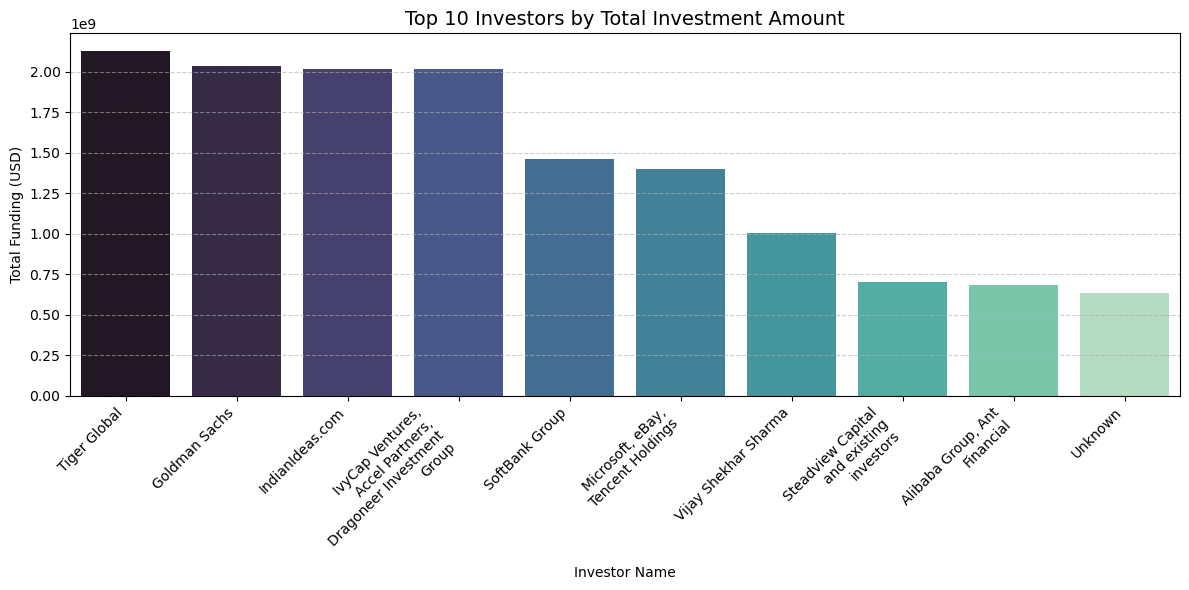

In [16]:
# --- Plot 1: Top 10 Investors by Total Investment Amount ---

plt.figure(figsize=(12, 6))
sns.barplot(data=top_investors_amount, x='Investors_Name', y='Amount_in_USD', palette='mako')

plt.title("Top 10 Investors by Total Investment Amount", fontsize=14)
plt.ylabel("Total Funding (USD)")
plt.xlabel("Investor Name")  # Fixed label
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("05_top_10_investor_by_total_investment_amount.jpg", bbox_inches='tight')
plt.show()

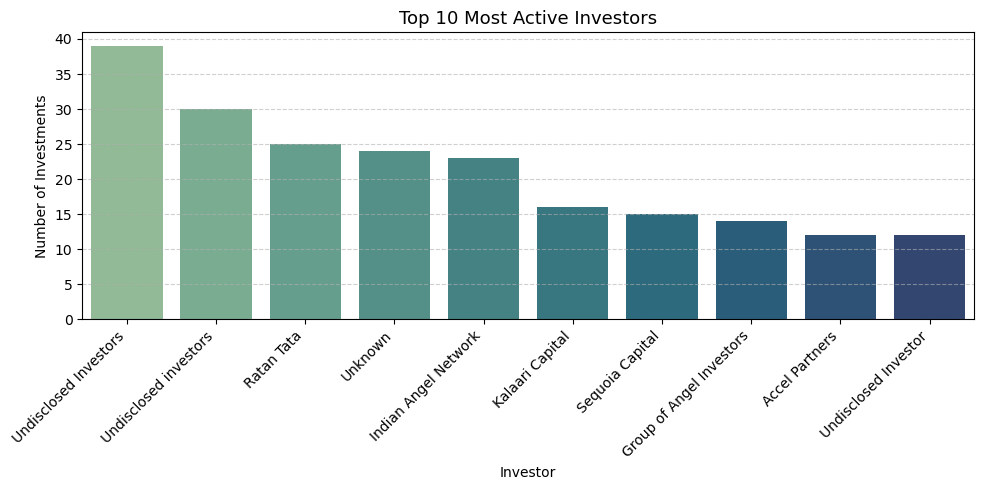

In [68]:
# --- Plot 2: Top 10 Most Active Investors (by Number of Investments) ---

plt.figure(figsize=(10,5))
sns.barplot(data=top_investors_count, x='Investors_Name', y='Investments_Count', palette='crest')
plt.title("Top 10 Most Active Investors", fontsize=13)
plt.ylabel("Number of Investments")
plt.xlabel("Investor")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("06_top_10_most_active_investors.jpg", bbox_inches='tight')
plt.show()

In [67]:
# --- Optional: Display both tables ---

print("\nTop 10 Investors by Total Investment Amount:")
display(top_investors_amount)

print("\nTop 10 Most Active Investors:")
display(top_investors_count)


Top 10 Investors by Total Investment Amount:


,Investors_Name,Amount_in_USD,Investments_Count
2325,Westbridge Capital,3.900000e+09,1
1950,Softbank,2.500000e+09,1
2388,\\xc2\\xa0Tiger\nGlobal,2.020000e+09,1
2383,\\xc2\\xa0IndianIdea\ns.com,2.019350e+09,1
2384,"\\xc2\\xa0IvyCap\nVentures, Accel\nPartners, D...",2.016200e+09,1
2382,\\xc2\\xa0Goldman\nSachs,2.010000e+09,1
1941,SoftBank Group,1.462000e+09,2
1296,"Microsoft, eBay,\nTencent Holdings",1.400000e+09,1
2275,Vijay Shekhar Sharma,1.002550e+09,4
1990,Steadview Capital\nand existing\ninvestors,7.000000e+08,1



Top 10 Most Active Investors:


,Investors_Name,Amount_in_USD,Investments_Count
2173,Undisclosed Investors,55306000.0,39
2179,Undisclosed investors,301686000.0,30
1649,Ratan Tata,264660000.0,25
2206,Unknown,632705951.0,24
907,Indian Angel Network,23010000.0,23
1044,Kalaari Capital,30000000.0,16
1838,Sequoia Capital,197850000.0,15
743,Group of Angel Investors,2959600.0,14
60,Accel Partners,119800000.0,12
2172,Undisclosed Investor,6680000.0,12


# ------------------------------------------------------------
# Step 2.5: Sector / Industry Analysis
# ------------------------------------------------------------

In [17]:
# Group by industry for total funding & number of investments

industry_stats = df.groupby('Industry_Vertical').agg({
    'Amount_in_USD': 'sum',
    'Startup_Name': 'count'
}).reset_index().rename(columns={'Startup_Name': 'Funding_Rounds'})

In [18]:
# Sort to find top 10 industries

top_industries_funding = industry_stats.sort_values(by='Amount_in_USD', ascending=False).head(10)
top_industries_rounds = industry_stats.sort_values(by='Funding_Rounds', ascending=False).head(10)

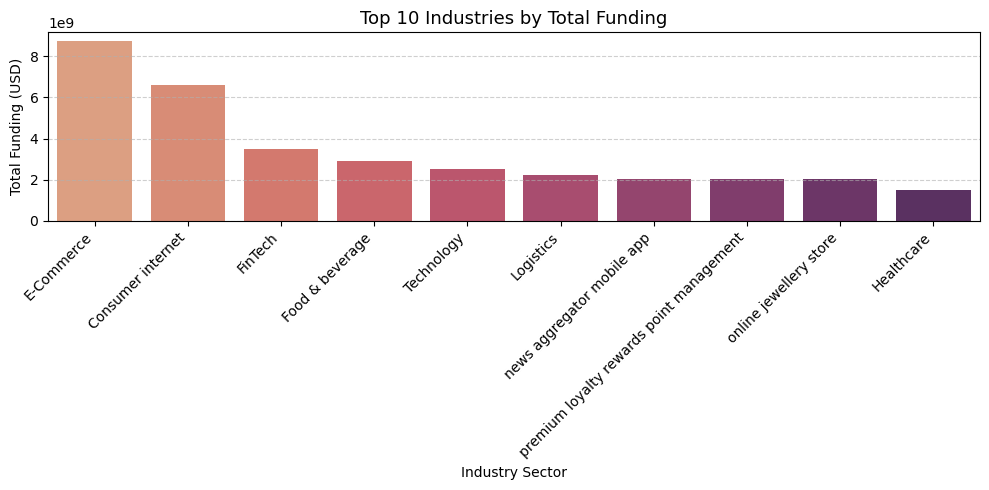

In [19]:
# --- Plot 1: Top 10 Industries by Total Funding Amount ---

plt.figure(figsize=(10,5))
sns.barplot(data=top_industries_funding, x='Industry_Vertical', y='Amount_in_USD', palette='flare')
plt.title("Top 10 Industries by Total Funding", fontsize=13)
plt.ylabel("Total Funding (USD)")
plt.xlabel("Industry Sector")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("07_top_10_industries_by_total_funding_amount.jpg", bbox_inches='tight')

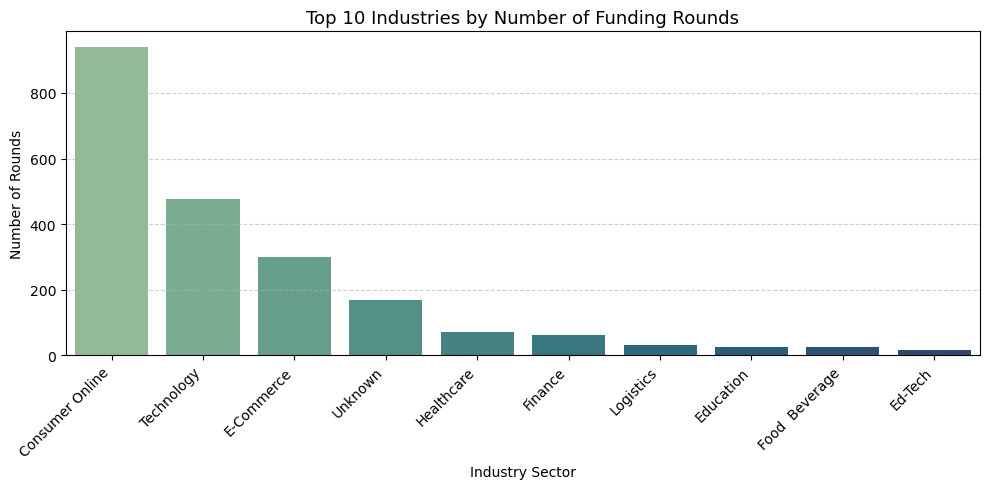

In [41]:
# --- Plot 2: Top 10 Industries by Number of Funding Rounds ---

plt.figure(figsize=(10,5))
sns.barplot(data=top_industries_rounds, x='Industry_Vertical', y='Funding_Rounds', palette='crest')
plt.title("Top 10 Industries by Number of Funding Rounds", fontsize=13)
plt.ylabel("Number of Rounds")
plt.xlabel("Industry Sector")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig("08_top_10_industries_by_number_of_funding_rounds.jpg", bbox_inches='tight')
plt.show()

In [31]:
# --- Display tables ---

print("\nTop 10 Industries by Total Funding:")
display(top_industries_funding)

print("\nTop 10 Industries by Number of Funding Rounds:")
display(top_industries_rounds)


Top 10 Industries by Total Funding:


,Industry_Vertical,Amount_in_USD,Funding_Rounds
112,Consumer Internet,6.609734e+09,940
785,eCommerce,5.110533e+09,186
727,Transportation,3.953632e+09,5
723,Technology,2.520908e+09,478
773,\\xc2\\xa0News Aggregator mobile app,2.020000e+09,1
778,\\xc2\\xa0Premium Loyalty Rewards Point Manage...,2.019350e+09,1
775,\\xc2\\xa0Online Jewellery Store,2.016200e+09,1
770,\\xc2\\xa0Casual Dining restaurant Chain,2.010000e+09,1
237,Finance,2.002398e+09,62
174,ECommerce,1.999298e+09,61



Top 10 Industries by Number of Funding Rounds:


,Industry_Vertical,Amount_in_USD,Funding_Rounds
112,Consumer Internet,6.609734e+09,940
723,Technology,2.520908e+09,478
785,eCommerce,5.110533e+09,186
739,Unknown,1.290961e+09,169
288,Healthcare,4.785180e+08,71
237,Finance,2.002398e+09,62
174,ECommerce,1.999298e+09,61
381,Logistics,2.818450e+08,32
169,E-Commerce,1.021675e+09,29
250,Food & Beverage,8.293600e+07,24


# ------------------------------------------------------------
# Step 2.6: Funding Trend Over the Years
# ------------------------------------------------------------

In [43]:
# Group by Year and calculate total funding

funding_trend = df.groupby('Year', as_index=False)['Amount_in_USD'].sum()

In [44]:
# Sort by Year for proper line chart

funding_trend = funding_trend.sort_values('Year')

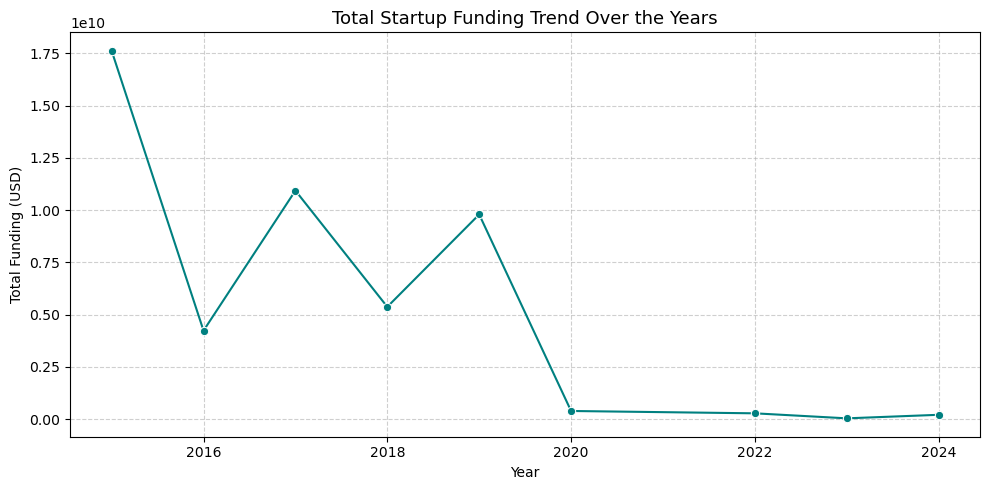

In [46]:
# Plot the funding trend

plt.figure(figsize=(10,5))
sns.lineplot(data=funding_trend, x='Year', y='Amount_in_USD', marker='o', color='teal')
plt.title("Total Startup Funding Trend Over the Years", fontsize=13)
plt.xlabel("Year")
plt.ylabel("Total Funding (USD)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("09_funding_trend.jpg", bbox_inches='tight')
plt.show()

# ------------------------------------------------------------
# Step 2.7: Top 10 Locations by Total Funding
# ------------------------------------------------------------

In [20]:
# Group by 'City_Location' and calculate total funding

city_funding = df.groupby('City_Location', as_index=False)['Amount_in_USD'].sum()

In [21]:
# Sort in descending order and pick top 10

top_10_cities = city_funding.sort_values(by='Amount_in_USD', ascending=False).head(10)

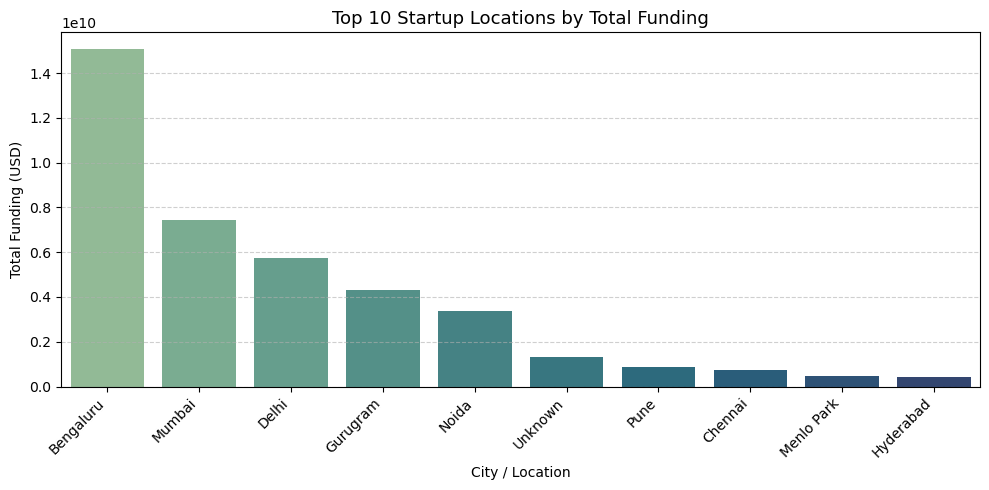

In [22]:
# Plot the top 10 cities by total funding
plt.figure(figsize=(10,5))
sns.barplot(data=top_10_cities, x='City_Location', y='Amount_in_USD', palette='crest')

plt.title("Top 10 Startup Locations by Total Funding", fontsize=13)
plt.xlabel("City / Location")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("10_top_10_cities_by_total_funding.jpg", bbox_inches='tight')
plt.show()

# ------------------------------------------------------------
# Step 2.8: Funding Distribution by Stage
# ------------------------------------------------------------

In [23]:
# Group by 'Investment_Type' and calculate total funding amount

funding_stage = df.groupby('InvestmentnType', as_index=False)['Amount_in_USD'].sum()

In [24]:
# Sort stages by funding amount in descending order

funding_stage = funding_stage.sort_values(by='Amount_in_USD', ascending=False)

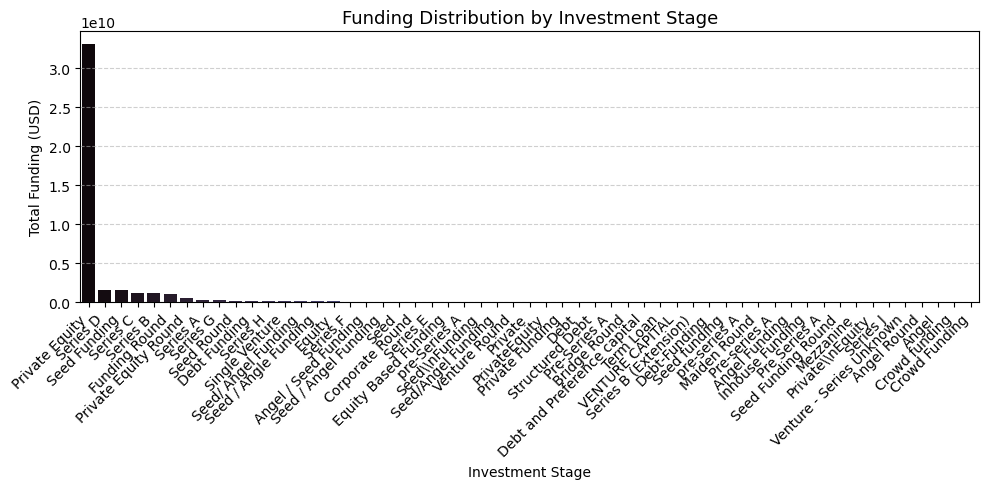

In [25]:
# Plot the distribution
plt.figure(figsize=(10,5))
sns.barplot(data=funding_stage, x='InvestmentnType', y='Amount_in_USD', palette='mako')

plt.title("Funding Distribution by Investment Stage", fontsize=13)
plt.xlabel("Investment Stage")
plt.ylabel("Total Funding (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("11_funding_distribution_by_stage.jpg", bbox_inches='tight')
plt.show()

# ------------------------------------------------------------
# Step 2.9: Investor Analysis (Top by Amount & Most Active)
# ------------------------------------------------------------

In [26]:
# Explode investor names and clean
df['Investors_Name'] = df['Investors_Name'].fillna('Undisclosed').astype(str)
investors_exp = df.assign(Investors_Name=df['Investors_Name'].str.split(r',|;| & | and ')).explode('Investors_Name')
investors_exp['Investors_Name'] = investors_exp['Investors_Name'].str.strip()

investor_amount = investors_exp.groupby('Investors_Name', as_index=False)['Amount_in_USD'].sum().sort_values('Amount_in_USD', ascending=False).head(15)

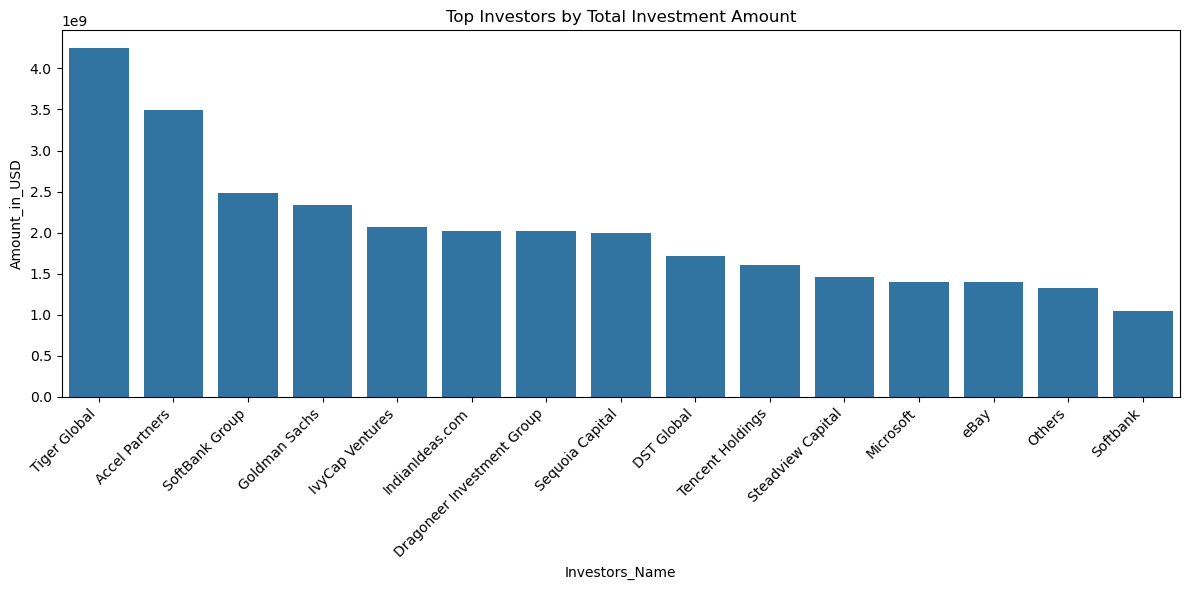

In [27]:
# # Top investors by total amount

plt.figure(figsize=(12,6))
sns.barplot(data=investor_amount, x='Investors_Name', y='Amount_in_USD')
plt.title("Top Investors by Total Investment Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("12_top_investors_by_amount.jpg", bbox_inches='tight')
plt.show()

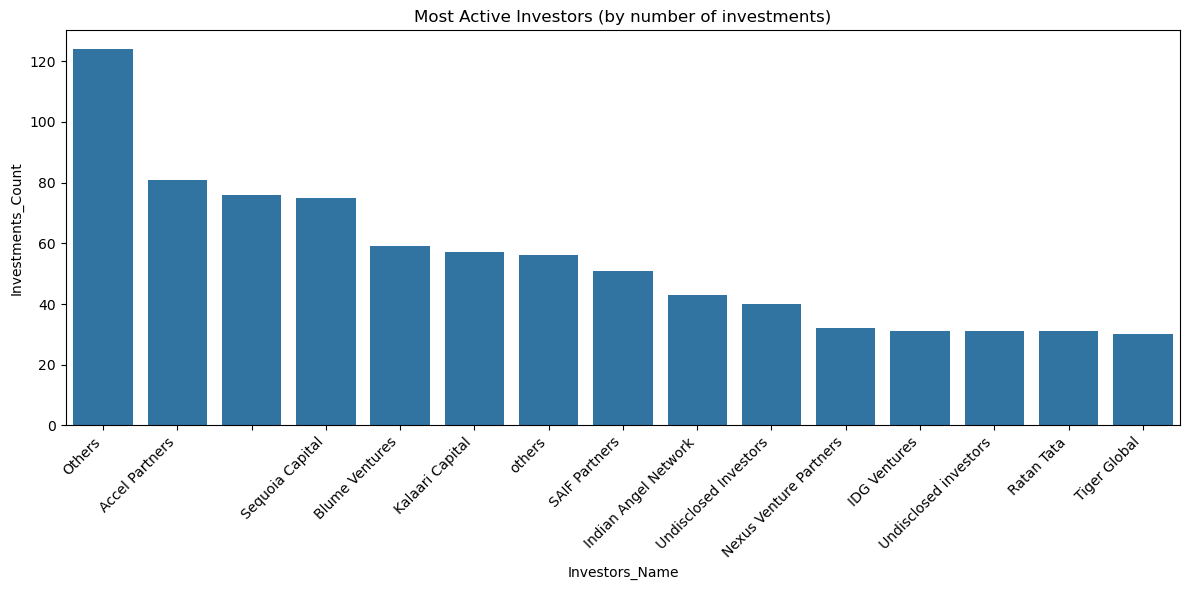

In [34]:
# Most active investors (count of investments)

investor_count = investors_exp.groupby('Investors_Name', as_index=False)['Startup_Name'].count().rename(columns={'Startup_Name':'Investments_Count'}).sort_values('Investments_Count', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=investor_count, x='Investors_Name', y='Investments_Count')
plt.title("Most Active Investors (by number of investments)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("13_most_active_investors.jpg", bbox_inches='tight')
plt.show()

In [ ]:
investor_amount, investor_count

# ------------------------------------------------------------
# Step 2.10: Startup Growth & Top Funded Startups
# ------------------------------------------------------------

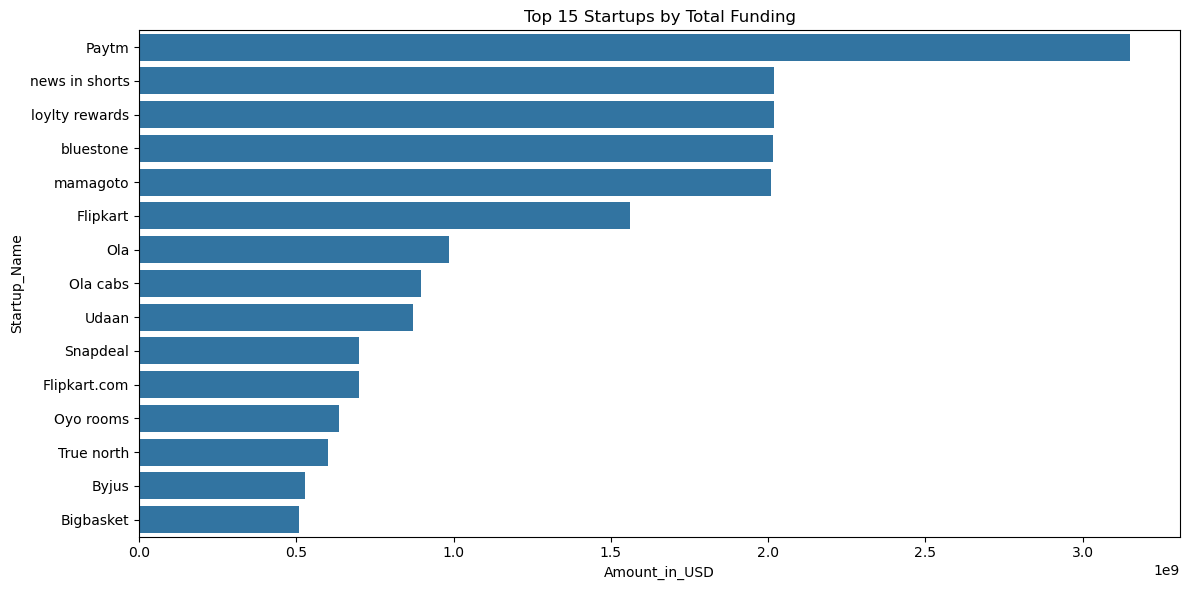

In [28]:
# Top startups by total funding
top_startups = df.groupby('Startup_Name', as_index=False)['Amount_in_USD'].sum().sort_values('Amount_in_USD', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=top_startups, x='Amount_in_USD', y='Startup_Name')
plt.title("Top 15 Startups by Total Funding")
plt.tight_layout()
plt.savefig("14_top_15_startups_by_funding.jpg", bbox_inches='tight')
plt.show()

# ------------------------------------------------------------
# Step 2.11: Key Insights & Export
# ------------------------------------------------------------

In [29]:
total_funding = df['Amount_in_USD'].sum()
unique_startups = df['Startup_Name'].nunique()
most_active_year = df['Year'].value_counts().idxmax()
top_city = df.groupby('City_Location')['Amount_in_USD'].sum().idxmax()
top_industry = df.groupby('Industry_Vertical')['Amount_in_USD'].sum().idxmax()

insights = [
    f"Total funding (2015–2024): ${total_funding:,.0f}",
    f"Unique startups analyzed: {unique_startups}",
    f"Year with most funding rounds: {most_active_year}",
    f"Top city by total funding: {top_city}",
    f"Top industry by funding: {top_industry}"
]
for i in insights:
    print("•", i)

• Total funding (2015–2024): $42,466,990,445
• Unique startups analyzed: 2350
• Year with most funding rounds: 2016
• Top city by total funding: Bengaluru
• Top industry by funding: E-Commerce
